In [2]:
# Source: https://github.com/Itseez/opencv/blob/master/samples/python2/peopledetect.py

import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')

from __future__ import print_function
import numpy as np
import argparse
import cv2
from cv2 import cv
from datetime import datetime
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def inside(r, q):
    rx, ry, rw, rh = r
    qx, qy, qw, qh = q
    return rx > qx and ry > qy and rx + rw < qx + qw and ry + rh < qy + qh

def draw_detections(img, rects, thickness = 1):
    for x, y, w, h in rects:
        # the HOG detector returns slightly larger rectangles than the real objects.
        # so we slightly shrink the rectangles to get a nicer output.
        pad_w, pad_h = int(0.15*w), int(0.05*h)
        cv2.rectangle(img, (x+pad_w, y+pad_h), (x+w-pad_w, y+h-pad_h), (255, 0, 0), thickness=3)

In [5]:
vidcap = cv2.VideoCapture('/Users/Saif/Downloads/test5.mov')
num_frames=vidcap.get(cv.CV_CAP_PROP_FRAME_COUNT)
frame_rate=vidcap.get(cv.CV_CAP_PROP_FPS)

In [6]:
startTime = datetime.now()
frames={}
count=0
while(count<=num_frames):
    success,image = vidcap.read()
    key = count
    frames[count] = image
    #if cv2.waitKey(10) == 27:                   
    #  break
    count += 1
print (datetime.now() - startTime)

0:00:15.470791


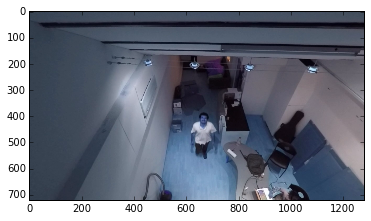

In [9]:
imgplot = plt.imshow(frames[320])

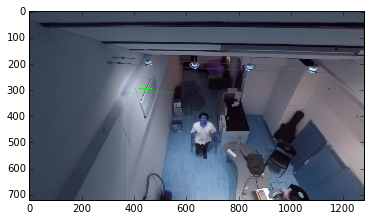

In [18]:
src=frames[320]
img=src.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#img=cv2.pyrUp(img_x)
found, w = hog.detectMultiScale(gray, winStride=(4,4), padding=(32,32), scale=1.20)
draw_detections(img, found)
imgplot = plt.imshow(img)

In [19]:
cv2.imshow('img', img)
cv2.waitKey(0)

113

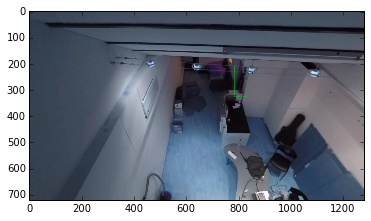

In [4]:
vidcap = cv2.VideoCapture('/Users/Saif/Downloads/test5.mov')

while(True):
    ret, img = vidcap.read()
    found, w = hog.detectMultiScale(img, winStride=(4,4), padding=(32,32), scale=1.70)
    draw_detections(img, found)
    imgplot = plt.imshow(img)

    cv2.imshow('video',img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [5]:
vidcap.release()
cv2.destroyAllWindows()

## Play around with image transformations

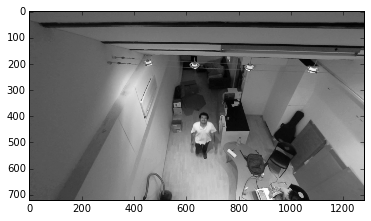

In [49]:
image=frames[320]
src = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgplot = plt.imshow(gray, cmap = cm.Greys_r)

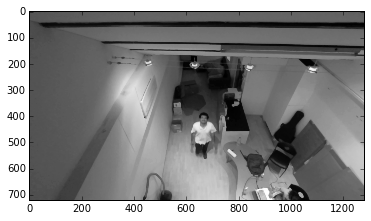

In [122]:
image2=cv2.medianBlur(gray,5)
imgplot = plt.imshow(image2,cmap = cm.Greys_r)

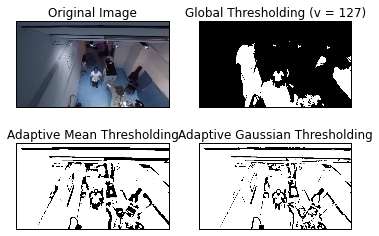

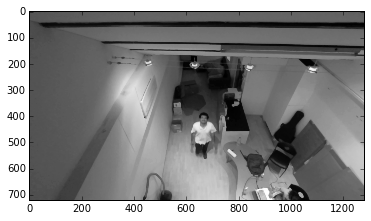

In [115]:
ret,th1 = cv2.threshold(image2,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(image2,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,75,12)
th3 = cv2.adaptiveThreshold(image2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,81,10)

titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image, th1, th2, th3]
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

imgplot = plt.imshow(image2,cmap = cm.Greys_r)

In [3]:
startTime = datetime.now()

image=frames[313]
src = image.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
use = cv2.medianBlur(gray,5)
th2 = cv2.adaptiveThreshold(use,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,75,12)

found, w = hog.detectMultiScale(th2, winStride=(4,4), padding=(32,32), scale=1.20)
draw_detections(src, found)
imgplot = plt.imshow(src)

print (datetime.now() - startTime)

NameError: name 'frames' is not defined

In [89]:
cv2.imshow('image',src)
cv2.waitKey(0)

113

In [87]:
cv2.destroyAllWindows()

## Test image transformations in video stream

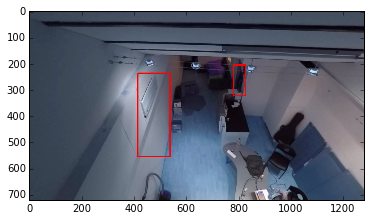

In [113]:
vidcap = cv2.VideoCapture('/Users/Saif/Downloads/test5.mov')

while(True):
    ret, img = vidcap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #med = cv2.medianBlur(gray,5)
    #modded = cv2.adaptiveThreshold(med,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,75,12)
    found, w = hog.detectMultiScale(gray, winStride=(4,4), padding=(32,32), scale=1.20)
    draw_detections(img, found)
    imgplot = plt.imshow(img)

    cv2.imshow('video',img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [114]:
vidcap.release()
cv2.destroyAllWindows()